# <font color = gree>PRDL & MLLB courses ETSIT - UPM</font>
> <font color=orange size= 4>Some examples of ML models for extreme OSA cases classification</font>
---


* ### We will use the data in: OSA_extreme_male.xlsx</font>




---
---
Load : OSA_extreme_male.xlsx  from your Laptop



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19281 bytes


In [ ]:
ls

OSA_extreme_male.xlsx  sample_data/


---

### Read the *OSA_extreme_male.xlsx* file

In [ ]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA_male_extreme = pd.read_excel("OSA_extreme_male.xlsx")


In [ ]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


* # Indicate the features we will use

In [ ]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Age', 'Cervical', 'BMI']


## We will use data (our features) as Numpy arrays

In [ ]:
import numpy as np

X = np.array(df_OSA_male_extreme[columns])


In [ ]:
X.shape

(278, 5)

In [ ]:
print(X[0:4])

[[ 80.         173.          32.          40.          26.7299275 ]
 [109.         190.          32.          42.          30.19390582]
 [ 86.         169.          39.          42.          30.11099051]
 [145.         172.          47.          44.          49.01297999]]


In [ ]:
df_OSA_male_extreme[columns][0:4]

,Weight,Height,Age,Cervical,BMI
0,80,173,32,40,26.729927
1,109,190,32,42,30.193906
2,86,169,39,42,30.110991
3,145,172,47,44,49.012980


# The outcome "y" will have tow values: binary classification

* # we can map "Healthy" to "0" and "Severe" to "1"

In [ ]:
df_OSA_male_extreme.OSA = df_OSA_male_extreme.OSA.map({'Healthy': 0, 'Severe': 1})

In [ ]:
df_OSA_male_extreme.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,0,26.729927
1,P0006,hombre,2.0,109,190,32,42,0,30.193906
2,P0007,hombre,34.0,86,169,39,42,1,30.110991
3,P0008,hombre,60.0,145,172,47,44,1,49.012980
4,P0013,hombre,3.7,90,180,36,40,0,27.777778


In [ ]:
y = np.array(df_OSA_male_extreme['OSA'])

In [ ]:
y[0:4]

array([0, 0, 1, 1])

# For this example we will a simple approach: 85% data for training and 15% for testing
* # BUT it is very important to know about CROSSVALIDATION
# and in particular: Nested or Double Loop Crossvalidation as we have to tune hiperparameters, you can read this blog:

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

---
---
# In next cells we follow a similar approach as in:
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))

Training data cases:  236  Test data cases:  42


* # We will start using <font color = magenta>**Logistic Regression**</font> in  [Scikit Learn Package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Note the parameters (hiperparameters) you must consider

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Now that the model is trained we can predict some cases:

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

# Compare Predictions with True values

In [ ]:
y_pred[0:4]

array([0, 0, 1, 1])

In [ ]:
y_test[0:4]

array([0, 0, 0, 1])

# You can also get the "probabilities" for each prediction for each class

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
# Two values: prob of "0" (Healthy) prob of "1" Severe (add up 1!)

y_pred_proba[0:4]

array([[0.60174556, 0.39825444],
       [0.761483  , 0.238517  ],
       [0.42196176, 0.57803824],
       [0.34205889, 0.65794111]])

# Now you can explore using several evaluation metrics, confussion matrix, etc...

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8333333333333334
Accuracy Score : 0.8333333333333334
Precision Score : 0.9166666666666666
Recall Score : 0.6470588235294118
F1 Score : 0.7586206896551724


* # The Confusion Matriz

In [ ]:
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cnf_matrix

array([[24,  1],
       [ 6, 11]])

Text(0.5, 15.0, 'Predicted')

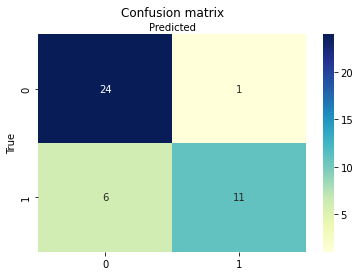

In [ ]:
import seaborn as sns

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# .... now you can try and compare other models.... use hyperparameyters selection etc...

* ## You can follow scikit learn documentation and examples, as this:
  https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py